## Linear Regression Model: As 'simple' as it gets!

Let's see how we can build a simple linear regression model in R - a model that seeks to find (and quantify) the linear relationship between a `predictor variable` (often called the `independent variable`), based on whose value we can (hopefully) estimate the `response variable`.

The dataset we'll use here is that of football, specifically the 1991 season leading quarterback and total team salary for football teams in the American Football Conference (AFC) and National Football Conference (NFC) of the National Football League(NFL). [_Reference_: The Associated Press as Reported by the Atlanta Constitution, December 1991]

We're trying to see if there is a relationship between the salary of the Quarterback and the total salary of the team. Let's load up the data:

In [3]:
data = read.table("Desktop/datasets/qbsalary.txt", header=TRUE)
head(data)

TEAM,QB,TOTAL,NFC
BILLS,650,24249,0
BENGALS,1050,20666,0
BROWNS,967,19413,0
BRONCOS,500,21992,0
OILERS,1700,21399,0
COLTS,2000,22022,0


The variables in the dataset are:
1. **TEAM**: Name of team
2. **QB**: Salary (in thousand USD) of regular quarterback
3. **TOTAL**: Total team salaries (in thousand USD)
4. **NFC**: National Football Conference (1) or American Football Conference (0)

Let's save the variables of interest (QB and TOTAL) as vectors: 

In [5]:
total = data$TOTAL
qb = data$QB

Before we get all excited and start building our model, let's take a pause and carry out some exploratory analysis. Data Science is as much as an art as it's a science, and for the time being let's concentrate on the 'art' part. Let's plot our data and see if at all there's a linear relationship or not. This should always be one of the first steps.

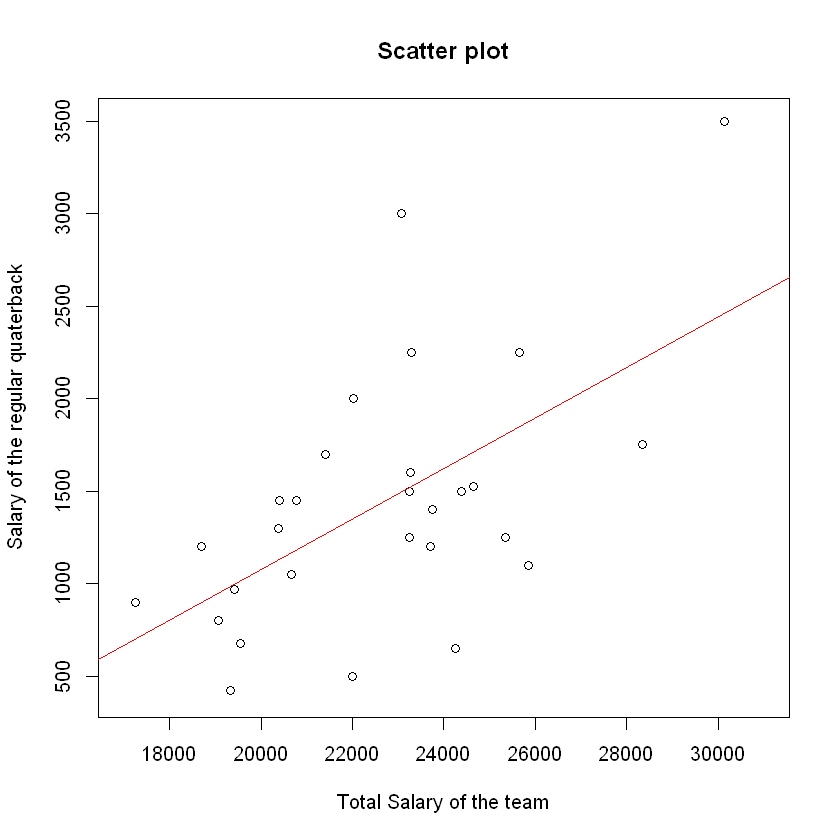

In [15]:
plot(total, qb, 
     main = "Scatter plot", 
     xlab = "Total Salary of the team",
     ylab = "Salary of the regular quaterback",
     xlim = c(17000, 31000), ylim = c(400, 3500))
abline(lm(qb ~ total), col = "red")

Not that exciting, is it? But it's still something.

Now let's see what our model has to say.

In [9]:
# R is so cool that you don't need any extra packages to build regression models
modelA = lm(qb ~ total)
summary(modelA)


Call:
lm(formula = qb ~ total)

Residuals:
     Min       1Q   Median       3Q      Max 
-1007.05  -350.86   -74.57   304.43  1503.17 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.649e+03  8.524e+02  -1.935  0.06395 . 
total        1.363e-01  3.739e-02   3.647  0.00117 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 575.8 on 26 degrees of freedom
Multiple R-squared:  0.3384,	Adjusted R-squared:  0.3129 
F-statistic:  13.3 on 1 and 26 DF,  p-value: 0.001166


Some very important numbers above in the model summary:
1. Estimate of Intercept: this is $\beta_{0}$ of our model
2. Estimate of total: this is $\beta_{1}$ of our model
3. Multiple R-squared: this tells us what percentage of the variation in our dependent variable is explained by the relationship between independent and dependent variables
3. p-value: this tells us if the relationship is statistically significant

Generally speaking, we're happy with our model when the value of $R^{2}$ is more than 0.7 (give or take). In this case, the value is 0.34, which means that we're better off NOT making estimates about our response variables using the value of predictor variables.

Let's talk about the p-value though. It is 0.0011, which is quite small, and thus indicates that there IS a statistically significant relationship between the predictor and response variables. We can thus make estimates, but those estimates will have a confidence intervals that would be rather large.

Lat's also talk about the meaning of the model parameters, $\beta_{0}$ and $\beta_{1}$.

$\beta_{0}$ is the intercept of the linear model that we're trying to build, in this context, it is the EXPECTED Quarterback salary when the total salary of the team is 0

$\beta_{1}$ is the slope of our model, in this context, it is EXPECTED the change in Quarterback salary ASSOCIATED with unit change in the total salary of the team

And thus, our model can be depicted as follows:

${Quarterback.Salary}$ = $\beta_{0} + \beta_{1} * Total.Team.Salary$, or

${Quarterback.Salary}$ = $-1650 + 0.136 * Total.Team.Salary$

We can also get a confidence interval for the our model parameters $\beta_{0}$ and $\beta_{1}$.

For both of thes values, their confidence interval can be calculated by using the values of their estimate, the standard error of that estimate, and a specific confidence level. Let's take the confidence level to be 99%. The confidence interval for our model parameters can then be calculated as follows:

$[l,u]$ $=$ $[\hat{\beta}$ $-$ $t_{0.005, n-1}$ * $se(\hat{\beta})$  $,$  $\hat{\beta}$ $+$ $t_{0.005, n-1}$ * $se(\hat{\beta})]$

where $\beta$ could be either $\beta_{0}$ or $\beta_{1}$. In R, we can do this as follows for $\beta_{1}$:

In [12]:
modelA$coef[2] + c(-1,1)*qt(.995, modelA$df)*0.03739

[1] 0.0324564 0.2402487

The 99% confidence interval for the slope parameter of our model is thus $[0.0324,0.2402]$

If we wish to make predictions of the Quarterback salary from some particuar value of Total team salary (in this case, we really shouldn't since the model is not very strong), we can do it as follows in R. Say we are trying to predict the Quarterback salary when the Total team salary is $25 million:

In [14]:
# we'll use a predictor value of 25000 and not 25 million, since the model is built on values in their thousands
dataA = data.frame(total = 25000) # new observation
predict(modelA, dataA, interval = "prediction", level = 0.95, type = "response") #confidence level of 95%

,fit,lwr,upr
1,1759.448,540.9576,2977.937


Hence, the predicted value of the salary of Quarterback (when the Total Salary of the Team is USD 25000000) is USD 1759448. For a 95% confidence level, the lower and upper values for the Quarterback salary are USD 540958 and USD 2977937 respectively.